In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense , LSTM , Dropout , Bidirectional
from keras.models import Sequential
from datetime import datetime
from numpy import sqrt
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import joblib
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df= pd.read_csv('C:/Users/annbl/Downloads/Bitcoin Price Predictions/coin_Solana.csv')
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Solana,SOL,2020-04-11 23:59:59,1.049073,0.765020,0.951054,0.776819,4.386244e+07,0.0
1,2,Solana,SOL,2020-04-12 23:59:59,0.956670,0.762426,0.785448,0.882507,3.873690e+07,0.0
2,3,Solana,SOL,2020-04-13 23:59:59,0.891603,0.773976,0.890760,0.777832,1.821129e+07,0.0
3,4,Solana,SOL,2020-04-14 23:59:59,0.796472,0.628169,0.777832,0.661925,1.674761e+07,0.0
4,5,Solana,SOL,2020-04-15 23:59:59,0.704964,0.621531,0.669289,0.646651,1.307528e+07,0.0


In [3]:
df.shape

(452, 10)

In [4]:
df.describe()


,SNo,High,Low,Open,Close,Volume,Marketcap
count,452.000000,452.000000,452.000000,452.000000,452.000000,4.520000e+02,4.520000e+02
mean,226.500000,11.190482,9.647555,10.400225,10.471388,1.956751e+08,2.588164e+09
std,130.625419,15.148788,13.006301,14.082328,14.114444,3.906998e+08,3.985932e+09
min,1.000000,0.559759,0.505194,0.513391,0.515273,6.520201e+05,0.000000e+00
25%,113.750000,1.484753,1.311024,1.410480,1.424761,7.851473e+06,3.056948e+07
50%,226.500000,3.018518,2.483870,2.867550,2.881389,1.858893e+07,1.042625e+08
75%,339.250000,15.270240,13.774265,14.262057,14.362851,1.802343e+08,3.811371e+09
max,452.000000,58.302927,46.187557,56.089257,55.910960,2.772225e+09,1.524342e+10


In [5]:
df.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        452 non-null    int64  
 1   Name       452 non-null    object 
 2   Symbol     452 non-null    object 
 3   Date       452 non-null    object 
 4   High       452 non-null    float64
 5   Low        452 non-null    float64
 6   Open       452 non-null    float64
 7   Close      452 non-null    float64
 8   Volume     452 non-null    float64
 9   Marketcap  452 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 35.4+ KB


In [7]:
tam1 = df.shape[0]
df.shape

(452, 10)

In [8]:
values = df['Close'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
np.mean(values)

10.471388

In [9]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

316 136


In [10]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [11]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

315
135


In [12]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [13]:
model = Sequential()
model.add(Bidirectional(LSTM(32)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.01))  # Changed dropout rate to 0.9
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.01))  # Changed dropout rate to 0.9
model.add(Dense(units=1))
model.build(input_shape=(trainX.shape[0], trainX.shape[1], trainX.shape[2]))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (315, 64)              │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (315, 128)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (315, 128)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (315, 64)              │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (315, 64)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (315, 1)               │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,345 (99.00 KB)

 Trainable params: 25,345 (99.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
 def train_model(model, loss, optimizer, trainX, trainY):

  model.compile(loss=loss, optimizer=optimizer)
  #train model
  history = model.fit(trainX, trainY, epochs=30, batch_size= 200,  validation_data = (testX, testY))
  # plot cost
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend()
  plt.show()

In [15]:
def evaluate_model(model, testX, testY):

  yhat = model.predict(testX)
  plt.title('Curve of actual value and predicted value on the scale used in training')
  plt.plot(yhat, label='predict')
  plt.plot(testY, label='true')
  plt.legend()
  plt.show()

  yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
  testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

  mse = mean_squared_error(testY_inverse, yhat_inverse)
  r2 = r2_score(testY_inverse, yhat_inverse)
  mae = mean_absolute_error(testY_inverse, yhat_inverse)
  evs = explained_variance_score(testY_inverse, yhat_inverse)
  rmse= sqrt(mse)

  print("Model: LSTM")
  print("Mean Squared Error:", mse)
  print("R-squared:", r2)
  print("Mean Absolute Error:", mae)
  print("Explained Variance Score:", evs)
  print("RMSE:", rmse)

  plt.title('Actual value curve and predicted value in US dollars')
  plt.plot(yhat_inverse, label='predict')
  plt.plot(testY_inverse, label='actual', alpha=0.5)
  plt.legend()
  plt.show()

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - loss: 0.0021 - val_loss: 0.2790
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0012 - val_loss: 0.2436
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.6441e-04 - val_loss: 0.2175
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.2069e-04 - val_loss: 0.2039
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.4572e-04 - val_loss: 0.1935
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.9032e-04 - val_loss: 0.1811
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 6.4061e-04 - val_loss: 0.1647
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.4858e-04 - val_loss: 0.1478
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4.5008e-04 - val_loss: 0.1341
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4.2032e-04 - val_loss: 0.1210
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.3536e-04 - val_loss: 0.1071
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

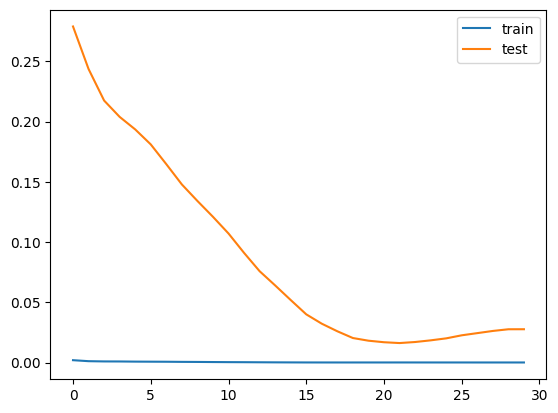

In [16]:
train_model(model, 'mse', 'adam', trainX, trainY)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


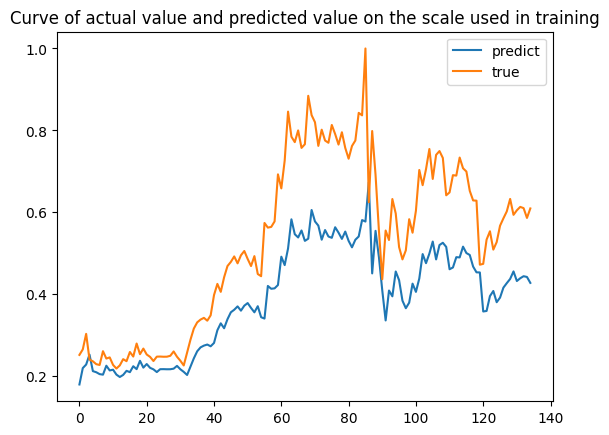

Model: LSTM
Mean Squared Error: 84.782005
R-squared: 0.34042169315675097
Mean Absolute Error: 7.7719274
Explained Variance Score: 0.8042815327644348
RMSE: 9.207714


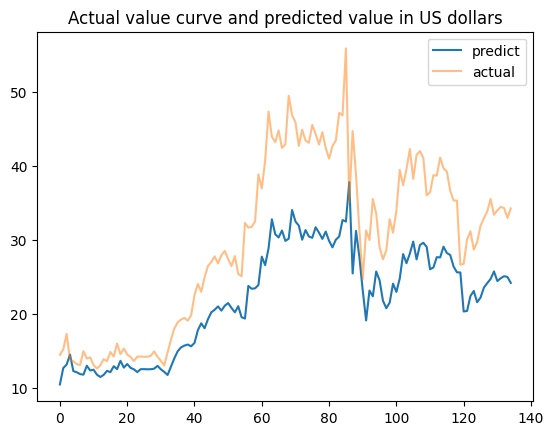

In [17]:
evaluate_model(model, testX, testY)

In [18]:
model.save('model_SOL.h5')

joblib.dump(scaler, 'scaler_sol.pkl')

['scaler_sol.pkl']

In [19]:
def create_time_steps(length):
  time_steps = []
  for i in range(-length, 0, 1):
    time_steps.append(i)
  return time_steps

def baseline(history):
  return np.mean(history)

def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

In [20]:
def predict_next_day(model, testX, testY):

  yhat_inverse = scaler.inverse_transform(model.predict(testX).reshape(-1, 1))
  testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

  show_plot([testY_inverse[0:100], yhat_inverse[101],baseline(testY_inverse[101])], 1, 'Next day prediction')

  print('predicted value of day 101: ', yhat_inverse[101])
  print('Actual value of day 101: ', testY_inverse[101])

In [21]:
predict_next_day(model, testX, testY)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
predicted value of day 101:  [24.785]
Actual value of day 101:  [39.470905]


In [ ]:
def predict_price(model, scaler, user_input):
    try:
        # Reshape and scale the input
        user_input_reshaped = user_input.reshape(-1, 1)
        user_input_scaled = scaler.transform(user_input_reshaped).reshape(1, -1, 1)

        # Predict
        prediction = model.predict(user_input_scaled)
        prediction_reshaped = np.repeat(prediction, user_input_scaled.shape[1]).reshape(1, -1)

        # Inverse transform
        prediction_inverse = scaler.inverse_transform(
            np.concatenate((user_input_scaled.reshape(1, -1), prediction_reshaped), axis=0)
        )[1]

        return prediction_inverse[1]
    except Exception as e:
        print("Error during prediction:", e)
        return None

# Example usage
user_input = np.array([[1.049073, 0.296827, 1.470724, 0.137136, 0.678620e+05, 1.986738e+07]])
predicted_value = predict_price(model, scaler, user_input)
print('Predicted Weighted Price:', predicted_value)

1/1 [==============================] - 1s 1s/step
Predicted Weighted Price: 85.1058593735893


In [ ]:
def predict_price(model, scaler, user_input):
    try:
        # Reshape and scale the input
        user_input_reshaped = user_input.reshape(-1, 1)
        user_input_scaled = scaler.transform(user_input_reshaped).reshape(1, -1, 1)

        # Predict
        prediction = model.predict(user_input_scaled)
        prediction_reshaped = np.repeat(prediction, user_input_scaled.shape[1]).reshape(1, -1)

        # Inverse transform
        prediction_inverse = scaler.inverse_transform(
            np.concatenate((user_input_scaled.reshape(1, -1), prediction_reshaped), axis=0)
        )[1]

        return prediction_inverse[1]
    except Exception as e:
        print("Error during prediction:", e)
        return None
print("Solana Price Prediction System")
print("---------------------------")

high = float(input("Enter the highest price: "))
low = float(input("Enter the lowest price: "))
open = float(input("Enter the open price: "))
close = float(input("Enter the close price: "))
volume = float(input("Enter the volume: "))
user_input = np.array([[high,low,open,close,volume]])
predicted_value = predict_price(model, scaler, user_input)
print('Predicted Weighted Price:', predicted_value)

Solana Price Prediction System
---------------------------
Enter the highest price: 211.6666077
Enter the lowest price: 199.608531
Enter the open price: 206.252403
Enter the close price: 211.345143
Enter the volume: 1.5194658
1/1 [==============================] - 0s 21ms/step
Predicted Weighted Price: 207.311116419278
